# Rosenthal Solution

$$ T=T_i + \frac{\eta P}{2\pi k r}\exp\left(\frac{V(x-r)}{2\alpha}\right)$$

In [1]:
#Import the necessary packages

import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from pyevtk.hl import imageToVTK 

In [2]:
#Data and setup
a=8.5e-6
g=2E-3
kt=5
Ti=298
v=2e-3
P=1000
l=(P/(2*np.pi*kt))

In [3]:
x=np.linspace(-5E-2,5E-2,100)
y=np.linspace(-5E-2,5E-2,100)
z=np.linspace(0,1E-2,50)

In [4]:
T=np.ones((100,100,50))

In [5]:
x0,y0,z0=0.0,0.0,0.0

In [6]:
for i in range(100):
    for j in range(100):
        for k in range(50):
            r= np.sqrt(((x[i]-x0)**2)+((y[j]-y0)**2)+((z[k]-z0)**2))
            T[j][i][k] = ((l/r)*np.exp(-1*(v/(2*a))*(-x[i]+r))) + Ti

In [7]:
# Export to VTK file to visualize in paraview
imageToVTK("rosenthal_3d", cellData = None, pointData = {"temp" : T} )

'/home/hariharan/lincoln_talk/rosenthal_3d.vti'

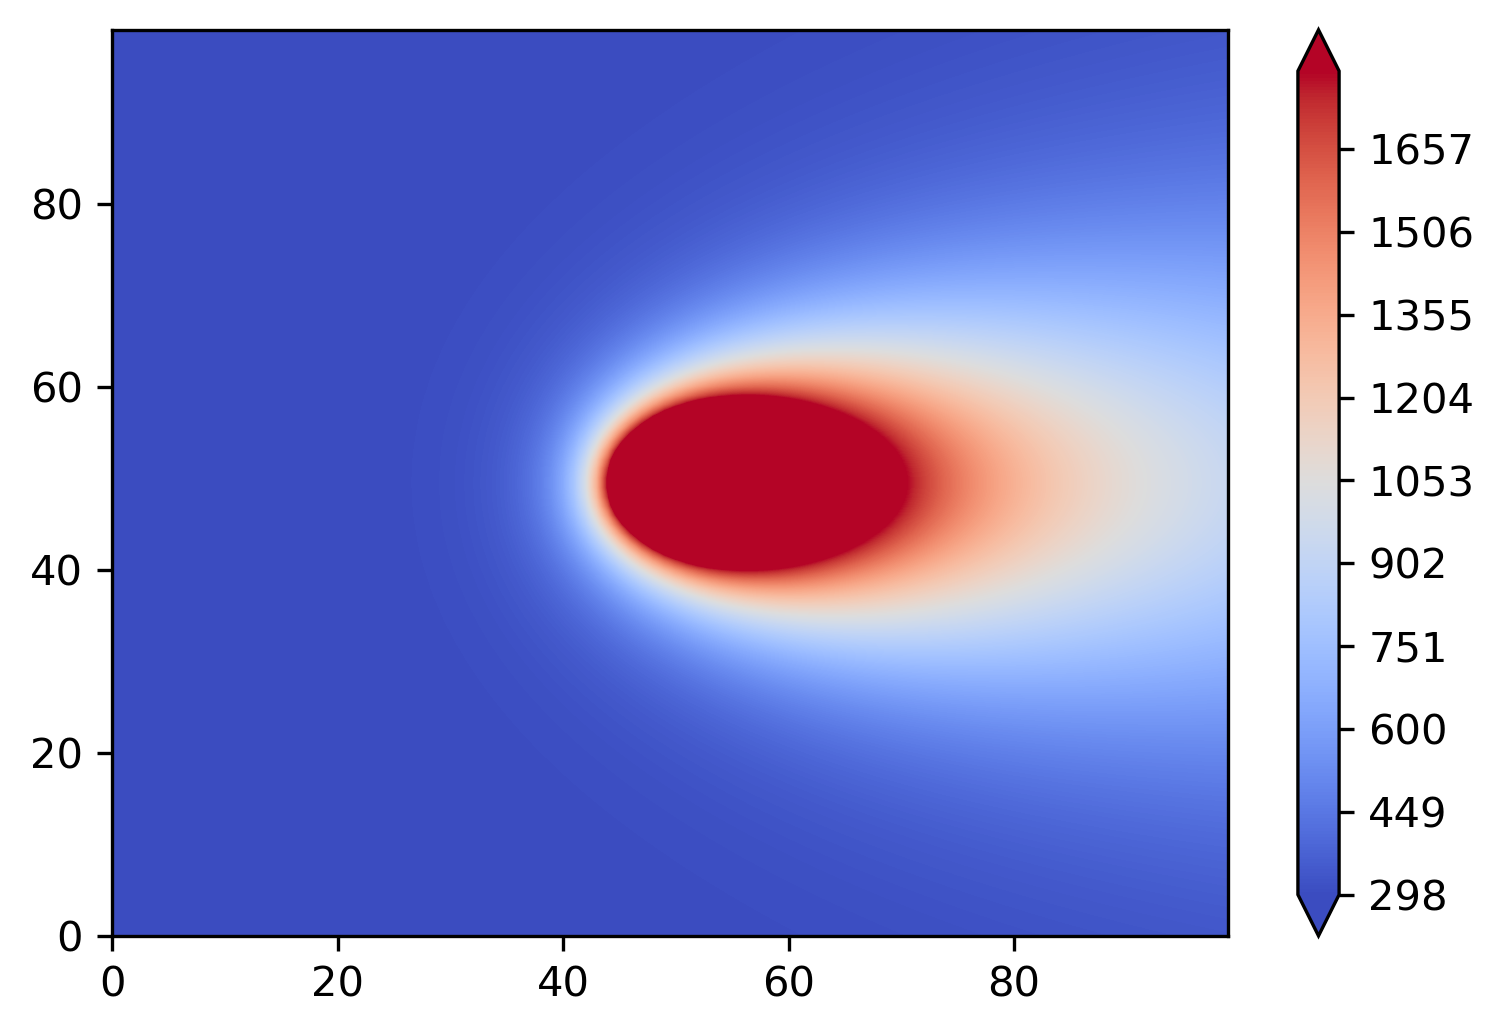

In [8]:
cs = plt.contourf(T[:,:,0],levels=np.arange(298,1800), cmap=plt.cm.coolwarm, extend="both")
cs.set_clim(298, 1800)
plt.gcf().set_dpi(300)
cb = plt.colorbar(cs)